<a href="https://colab.research.google.com/github/MeghnaSedhain/MACHINE-_LEARNING/blob/main/MLlab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="Species")

In [4]:
print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
y_pred_knn = knn.predict(X_test_scaled)
print("🔹 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("🔹 KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("🔹 KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

🔹 KNN Accuracy: 1.0
🔹 KNN Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
🔹 KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
svm = SVC(kernel='linear')  # You can try 'rbf', 'poly' too
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [10]:
y_pred_svm = svm.predict(X_test_scaled)
print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("🔹 SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("🔹 SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

🔹 SVM Accuracy: 0.9666666666666667
🔹 SVM Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
🔹 SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



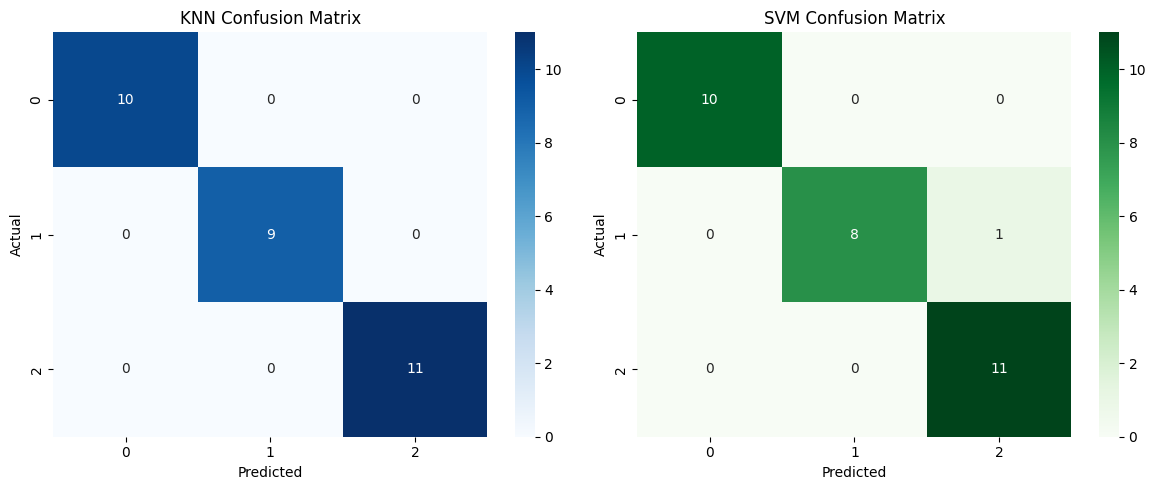

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='d')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Greens', fmt='d')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()